## CO2 EMISSIONS PREDICTION

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
# Reading the csv files into df
df = pd.read_csv('C:/Users/USER/Downloads/FuelConsumption.csv')

In [3]:
# Reading the first 5 rows of the data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# checking the data types of the data
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [6]:
# Checking the summary statistics of the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [8]:
# Checking for missing values
df.isnull()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,False,False,False,False,False,False,False,False,False,False,False,False,False
1063,False,False,False,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# getting the numeric data from the dataset
data = df._get_numeric_data()

In [10]:
# Printing statistical correlation of the numerical data
data.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [11]:
# Printing the sum of the missing values
data.isnull().sum()

MODELYEAR                   0
ENGINESIZE                  0
CYLINDERS                   0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [12]:
from scipy import stats

In [13]:
# Calculating the pearson coefficient and p_value of Cylinder to Co2emissions
pearson_coef, p_value = stats.pearsonr(df['CYLINDERS'], df['CO2EMISSIONS'])
pearson_coef, p_value

(0.8496845920141145, 2.770937203987647e-298)

<Axes: ylabel='CYLINDERS'>

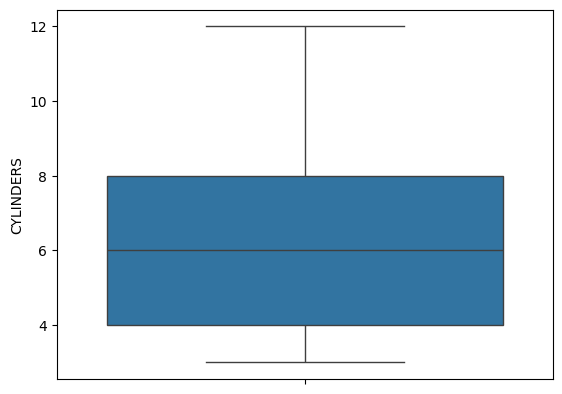

In [14]:
sns.boxplot(df['CYLINDERS'])

C:\Users\USER\AppData\Local\Temp\ipykernel_2444\798528966.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins=20)


<Axes: ylabel='Density'>

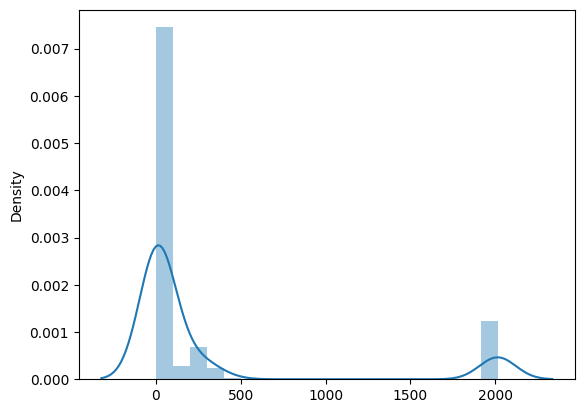

In [15]:
sns.distplot(data, bins=20)

In [16]:
# Importing the train_test_split package from scikit-learn to split the data into training set and test set
from sklearn.model_selection import train_test_split

In [17]:
# Drop the model year column
data_without_modelyear = data.drop(['MODELYEAR'], axis=1)
x = data_without_modelyear.drop(['CO2EMISSIONS'], axis=1)
y = data_without_modelyear['CO2EMISSIONS']

In [18]:
x.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [19]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Creating a linear regression function called lm
lm = LinearRegression()
lm

LinearRegression()

In [21]:
# Fitting the linear regression model
lm.fit(x_train, y_train)

LinearRegression()

In [22]:
# printing the coefficient of the linear regression
lm.coef_

array([  8.96115125,   7.24023686, -13.00156667,  -5.47215573,
        21.86697334,  -4.03446041])

In [23]:
# printing the intercept
lm.intercept_

262.57216086987376

In [24]:
# Predicting a new set of arrays
yhat = lm.predict(x_test)
yhat[0:4]

array([309.39729966, 241.79511652, 278.91485769, 237.65603094])

In [25]:
from sklearn.metrics import r2_score

In [26]:
# Calculating the R-squared error
r2 = lm.score(x_test, y_test)
r2

0.9034041224574011

In [27]:
# Calculating the mean squared error of the model
np.mean((yhat - y_test) ** 2)

399.41868891442715

In [28]:
# Importing the cross validation package from sklearn
from sklearn.model_selection import cross_val_score

In [29]:
# Performing cross validation on 4 folds
scores = cross_val_score(lm, x_test, y_test, cv=4)

In [30]:
scores

array([0.89287908, 0.86775247, 0.88226925, 0.94369337])

In [31]:
print("The mean of the folds are", scores.mean(), "and the standard deviation is" , scores.std())

The mean of the folds are 0.8966485434408711 and the standard deviation is 0.0285883331045775


In [32]:
-1 * cross_val_score(lm,x_test, y_test,cv=4,scoring='neg_mean_squared_error')

array([336.61731463, 548.02231914, 474.47519896, 294.1225966 ])

In [33]:
from sklearn.model_selection import cross_val_predict

In [34]:
# Printing out the cross validation predict
yhat = cross_val_predict(lm,x_test, y_test,cv=4)
yhat[0:5]

array([308.2596487 , 243.58924356, 277.23623581, 236.37993957,
       203.62277068])

In [35]:
# Importing Ridge from sklearn
from sklearn.linear_model import Ridge

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Listing out alpha parameters
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [38]:
# Initialize Ridge regression model
RR=Ridge()
RR

Ridge()

In [39]:
# Set up GridSearchCV for hyperparameter tuning of Ridge regression
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [40]:
# Fit the GridSearchCV object to the training data
Grid1.fit(x_test, y_test)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [41]:
# Extract the best Ridge regression model from GridSearchCV results
BestRR=Grid1.best_estimator_
# Create a new Ridge regression model with alpha=10 (likely based on GridSearchCV results)
BestRR

Ridge(alpha=10)

In [42]:
# Calculate and print the model's score on the test data
BestRR.score(x_test, y_test)

0.9048860926841565

In [43]:
# Importing the necessary libraries
import os
import pickle

In [44]:
# Set the file path for saving/loading the model
path = 'C:/Users/USER/Documents/my_first_linear_regression_model.pkl'
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(path), exist_ok=True)

In [45]:
# Save the trained model to a file using pickle
with open(path, 'wb') as f:
    pickle.dump(lm, f)

In [46]:
# Load the saved model from the file
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)

In [47]:
# Use the loaded model to make predictions on the test data
predictions = loaded_model.predict(x_test)

## AUTHOR

### ADEWUYI THANNI AYOMIDE